# Imports and Functions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10,8)
#font = {'size'   : 22}
#plt.rc('font', **font)
plt.style.use('G:\\My Drive\\Lab Data\\2018\\0202 - CBP optical degradation\\my.mplstyle')
import numpy as np
from pymongo import MongoClient
import palettable
from bson.objectid import ObjectId
from collections import OrderedDict
from cycler import cycler
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns

c=MongoClient('holmes-carl.cems.umn.edu',27017)
db=c.oleds
db.authenticate('lifetime','Ir(ppy)3')

def multiWorksheet(filename):
    df=pd.read_csv(filename,skiprows=[1])
    df.drop([0],inplace=True)
    df['405Signal']=(df['Laser Signal']-df['Background'].mean())/(df['Laser Signal']-df['Background'].mean()).max()
    
    df['350Signal']=(df['PL (with J)']-df['Background'].mean())/(df['PL (with J)']-df['Background'].mean()).max()
    
    return df

def singleWorksheet(filename):
    df=pd.read_csv(filename,skiprows=[1])
    df.drop([0],inplace=True)
    df['Signal']=df['Laser Signal']/df['Laser Signal'].max()
    return df

def cleanSignal(OnTime,Signal):
    # Normalize
    Signal = np.array(Signal)
    NormSignal = Signal/np.amax(Signal)
    for di in range(0,30):
        difference = np.absolute(np.diff(NormSignal))
        tolerance = 0.04
        delete_indices = np.where(difference>tolerance)
        if not delete_indices[0].size==0:
            delete_index = delete_indices[0][0]
        else:
            delete_index = np.array([])
        # If not the first point, add 1
        if delete_index:
            delete_index +=1
        # If delete_index is not empty, remove data
        if not delete_index.size==0 and delete_index < len(Signal):
            Signal = np.delete(Signal,delete_index)
            OnTime = np.delete(OnTime,delete_index)
            NormSignal = Signal/max(Signal)
    # Not positive on best way to return these
    return OnTime,Signal

## Dataframes

In [3]:
# 2/2 CBP degradation at 405
cbp405=pd.read_csv('0202_cbp_405.csv',skiprows=[1])
cbp405['Signal']=cbp405['Device Signal']/cbp405['Device Signal'].max()

# 2/5 mCP degradation at 405
mcp405=pd.read_csv('0205_mcp_405.csv',skiprows=[1])
mcp405['Signal']=mcp405['Device Signal']/mcp405['Device Signal'].max()

# 2/16 mCP degradation at 350
mcp350=pd.read_csv('0216_mcp_350.csv',skiprows=[1])
mcp350['Signal']=mcp350['Laser Signal']/mcp350['Laser Signal'].max()

# 2/19 CBP degradation at 350
cbp350=pd.read_csv('0219_cbp_350.csv',skiprows=[1])
cbp350['Signal']=cbp350['Laser Signal']/cbp350['Laser Signal'].max()

# 2/21 mCP pumped at 350, intermittent 405.  NOT COMPATIBLE WITH OTHER 350405.  Optics were changed
mcp350405_i=multiWorksheet('0221_mcp_350_405.csv')

# 2/26 mCP pumped at 300 (10 nm FWHM), intermittent 405
mcp300405=multiWorksheet('180226_B4_C1_0p000mA_mcp_300_400_PL.csv')

# 3/9 mCP pumped at 325-400 (1 short pass, 1 long pass), intermittent 405
mcp325405=multiWorksheet('180309_B4_C1_0p000mA_mcp_325_400_r2_PL.csv')

# 3/12 mCP pumped at 325-400 (1 short pass, 1 long pass), intermittent 405
mcp325405=multiWorksheet('180312_B4_C1_0p000mA_mcp_325_400_r6_PL.csv')

# Host Comparison
# The enclosed block did not change any optics so are all comparable
#################################################################

# 3/13 CDBP pumped at 350, intermittent 405
# Cannot use function because last point had lid open.  Ruins normalization
cdbp350405=pd.read_csv('180313_B4_C1_0p000mA_cdbp_350_40_r2_PL.csv',skiprows=[1])
cdbp350405.drop([0],inplace=True)
cdbp350405.drop([527],inplace=True)
cdbp350405['405Signal']=(cdbp350405['Laser Signal']-cdbp350405['Background'].mean())/(cdbp350405['Laser Signal']-cdbp350405['Background'].mean()).max()
cdbp350405['350Signal']=(cdbp350405['PL (with J)']-cdbp350405['Background'].mean())/(cdbp350405['PL (with J)']-cdbp350405['Background'].mean()).max()

# 3/22 CDBP pumped at 350, intermittent 405
cdbp350405_r2=multiWorksheet('180322_B4_C1_0p000mA_cdbp_350_40_r2_PL.csv')

# 3/23 CDBP pumped at 350, intermittent 405
cdbp350405_r3=multiWorksheet('180323_B4_C1_0p000mA_cdbp_350_40_r3_PL.csv')

# 3/14 BCBP pumped at 350, intermittent 405
bcbp350405=multiWorksheet('180314_B4_C1_0p000mA_bcbp_350_40_r1_PL.csv')

# 3/15 BCBP pumped at 350, intermittent 405
bcbp350405_r2=multiWorksheet('180315_B4_C1_0p000mA_bcbp_350_40_r2_PL.csv')

# 3/16 BCBP pumped at 350, intermittent 405. 350 is garbage signal
bcbp350405_r3=multiWorksheet('180316_B4_C1_0p000mA_bcbp_350_40_r3_PL.csv')

# 3/19 mCP pumped at 350, intermittent 405. 
mcp350405=multiWorksheet('180319_B4_C1_0p000mA_mcp_350_40_r1_PL.csv')

# 3/20 mCP pumped at 350, intermittent 405. 
mcp350405_r2=multiWorksheet('180320_B4_C1_0p000mA_mcp_350_40_r2_PL.csv')

# 3/21 cbp pumped at 350, intermittent 405. 
cbp350405=multiWorksheet('180321_B4_C1_0p000mA_cbp_350_40_r1_PL.csv')
#################################################################


# 405 Degradations

# 3/29 cbp pumped at 405
cbp405_r2=multiWorksheet('180329_B4_C1_0p000mA_cbp_405_r2_PL.csv')

# 3/26 cdbp pumped at 405
cdbp405_r1=multiWorksheet('180326_B4_C1_0p000mA_cdbp_405_r1_PL.csv')

# 3/28 bcbp pumped at 405
bcbp405_r4=multiWorksheet('180328_B4_C1_0p000mA_bcbp_405_r4_PL.csv')

mcp405_r1=singleWorksheet('180330_B4_C1_0p000mA_mcp_405_r1_during.csv')

cdbp405_r2=singleWorksheet('180402_B4_C1_0p000mA_cdbp_405_r2_during.csv')

mcp405_r2=singleWorksheet('180403_B4_C1_0p000mA_mcp_405_r2_during.csv')

cbp405_r3=singleWorksheet('180404_B4_C1_0p000mA_cbp_405_r3_during.csv')

cdbp405_r3=singleWorksheet('180406_B4_C1_0p000mA_cdbp_405_r3_during.csv')

# slightly changed angle

bcbp405_r5=singleWorksheet('180409_B4_C1_0p000mA_bcbp_405_r5_during.csv')

cbp405_d2_r1=singleWorksheet('180411_B4_C1_0p000mA_cbp_405_d2_r1_during.csv')

mcp405_d2_r1=singleWorksheet('180413_B4_C1_0p000mA_mcp_405_d2_r1_during.csv')

bcbp405_d2_r1=singleWorksheet('180416_B4_C1_0p000mA_bcbp_405_d2_r1_during.csv')

cdbp405_d2_r1=singleWorksheet('180418_B4_C1_0p000mA_cdbp405_d2_r1_during.csv')

cbp405_d2_r2=singleWorksheet('180420_B4_C1_0p000mA_cbp405_d2_r2_during.csv')

mcp405_d2_r2=singleWorksheet('180423_B4_C1_0p000mA_mcp405_d2_r2_during.csv')


# 405 degradation, low doping concentration

cbp405_1pct_r1=singleWorksheet('180425_B4_C1_0p000mA_cbp405_1pct_r1_during.csv')

mcp405_1pct_r1=singleWorksheet('180427_B4_C1_0p000mA_mcp405_1pct_r1_during.csv')

bcbp405_1pct_r1=singleWorksheet('180503_B4_C1_0p000mA_bcbp405_1pct_r1_during.csv')

cdbp405_1pct_r1=singleWorksheet('180509_B4_C1_0p000mA_cdbp405_1pct_r1_during.csv')

cdbp405_1pct_r2=singleWorksheet('180514_B4_C1_0p000mA_cdbp405_1pct_r2_during.csv')

# Single Wavelength Degradations

This initial study looked at degrading CBP and mCP under a single wavelength.  405 was found to be the same for all since just degrading Ir(ppy)3 (see optical constants).  350 nm showed a dependence on host.

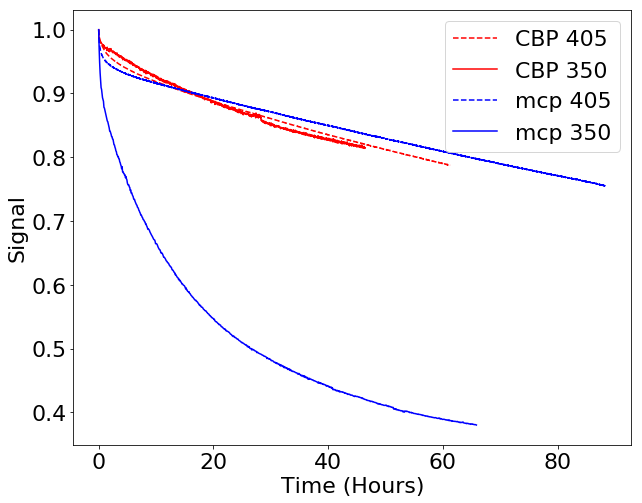

In [2]:
plt.plot(cbp405['On Time'],cbp405['Signal'],c='red',linestyle='--',label='CBP 405')
plt.plot(cbp350['On Time'],cbp350['Signal'],c='red',linestyle='-',label='CBP 350')
plt.plot(mcp405['On Time'],mcp405['Signal'],c='blue',linestyle='--',label='mcp 405')
plt.plot(mcp350['On Time'],mcp350['Signal'],c='blue',linestyle='-',label='mcp 350')
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
plt.legend()
plt.show()

The above plot indicates that at 405, we are just seeing Ir(ppy)3 degradation in both materials, due to the absorption.  At 350, we are likely pumping both hosts, but at a different intensity.  For CBP, we see the same behavior, which is interesting because of the intensity, but it likely indicates we are just seeing Ir(ppy)3 degradation.  However, in mCP, we see accelerated degradation.  This could be due to mCP degradation, degradation of exciton transfer, or better pumping of mCP.

John says he doesn't trust these CBP optical constants.  I'm redoing them

# Two Wavelength Degradations on mCP

This will seperate what is happening to Ir(ppy)3 itself (when pumped at 405, that is all that is being excited) from the host to Ir(ppy)3 transfer.

## 350 pump, 405 probe

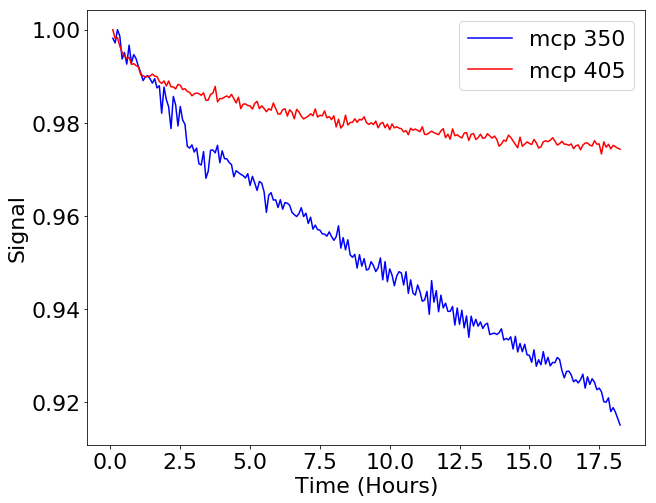

In [26]:
plt.plot(mcp350405_i['On Time'],mcp350405_i['350Signal'],c='blue',linestyle='-',label='mcp 350')
plt.plot(mcp350405_i['On Time'],mcp350405_i['405Signal'],c='red',linestyle='-',label='mcp 405')
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
plt.legend()
plt.show()

In this test, I did degradation at 350, but intermittent probed with 405 to just pump Ir(ppy)3, not the host.  Here, we see that Ir(ppy)3 is degrading slower than the host, or exciton process.  This shows that we are not accelerating degradation of Ir(ppy)3, but changing mCP or the transfer.

After talking with Russ, we thought it was valuable to try degrading at a deeper UV source and see what happened.  Also, we needed to check pump power.

## 300 pump, 405 probe

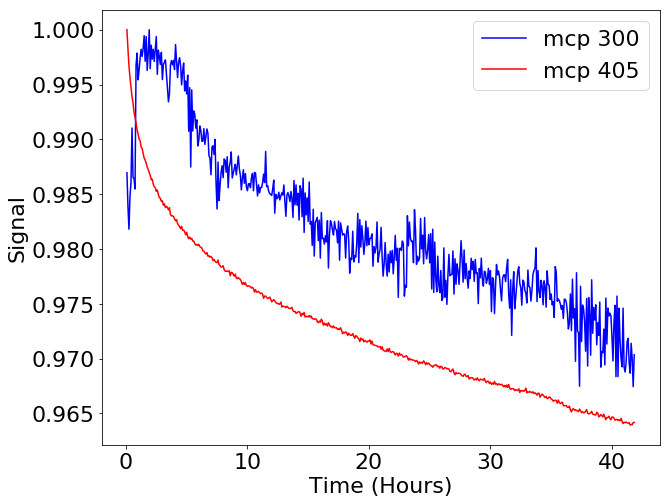

In [15]:
plt.plot(mcp300405['On Time'],mcp300405['350Signal'],c='blue',linestyle='-',label='mcp 300')
plt.plot(mcp300405['On Time'],mcp300405['405Signal'],c='red',linestyle='-',label='mcp 405')
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
plt.legend()
plt.show()

Pumping at 300, there was not enough intensity, due to the narrow band, to have good signal at 300.

## 325-400 Pump, 405 Probe

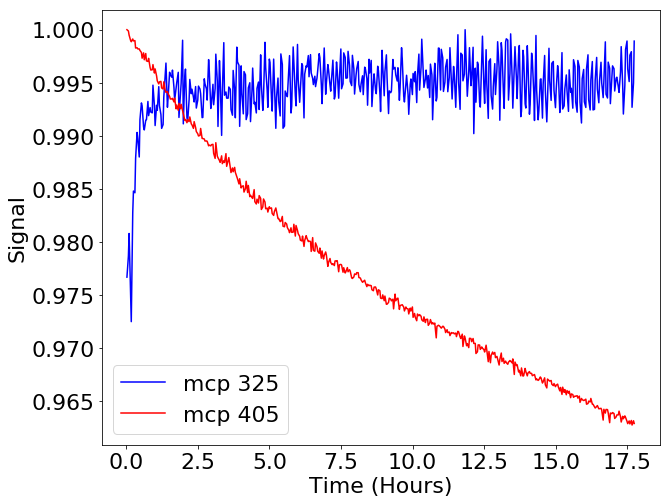

In [19]:
plt.plot(mcp325405['On Time'],mcp325405['350Signal'],c='blue',linestyle='-',label='mcp 325')
plt.plot(mcp325405['On Time'],mcp325405['405Signal'],c='red',linestyle='-',label='mcp 405')
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
plt.legend()
plt.show()

With the 325, due to the red spectral feature, I think the actual signal is buried.  The signal at 325 was very high.

## Summary

This study was hoping to show some differences and acceleration in degradation when moving further into the UV.  However, not all tests were successful, and the pumps varied in intensity, so comparisons could not be made.

Moving forward, comparisons need to be made between hosts.

# Host Comparison at 350 nm

We want to compare all host degradation at 350.  Does it follow the EL trend?

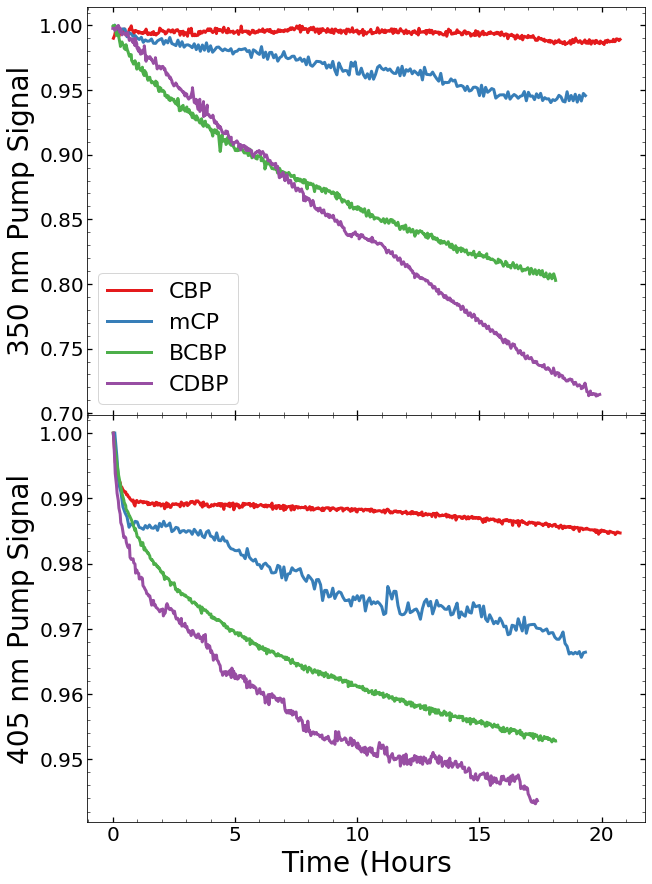

In [142]:
f, axarr = plt.subplots(2, sharex=True,figsize=(10,15))
#axarr[0].set_color_cycle(palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
axarr[0].set_prop_cycle(cycler('color',palettable.colorbrewer.qualitative.Set1_9.mpl_colors))
axarr[0].plot(cbp350405['On Time'],cbp350405['350Signal'],label='CBP')
axarr[0].plot(mcp350405_r2['On Time'],mcp350405_r2['350Signal'],label='mCP')
axarr[0].plot(bcbp350405_r2['On Time'],bcbp350405_r2['350Signal'],label='BCBP')
axarr[0].plot(cdbp350405['On Time'],cdbp350405['350Signal'],label='CDBP')
#axarr[0].plot(cdbp350405_r2['On Time'],cdbp350405_r2['350Signal'],label='CDBP')

axarr[0].legend()
axarr[0].set_ylabel('350 nm Pump Signal')

axarr[1].set_prop_cycle(cycler('color',palettable.colorbrewer.qualitative.Set1_9.mpl_colors))
axarr[1].plot(cbp350405['On Time'],cbp350405['405Signal'],label='CBP')
axarr[1].plot(mcp350405_r2['On Time'],mcp350405_r2['405Signal'],label='mCP')
axarr[1].plot(bcbp350405_r2['On Time'],bcbp350405_r2['405Signal'],label='BCBP')
#axarr[1].plot(cdbp350405['On Time'],cdbp350405['405Signal'],label='CDBP')
axarr[1].plot(cdbp350405_r2['On Time'],cdbp350405_r2['405Signal'],label='CDBP')

axarr[1].set_ylabel('405 nm Pump Signal')
axarr[1].set_xlabel('Time (Hours')
axarr[0].tick_params(axis='both',direction='in',top='on',right='on',length=5)
axarr[1].tick_params(axis='both',direction='in',top='on',right='on',length=5)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Here, we see the Optical lifetimes for just the 350 signal.  This does follow the EL trend, shown below.  If the 350 pump only of CBP and mCP conducted earlier are overlayed on this, we can see that those are shorter lived, likely indicating an optical change since things have been moved around.

## Reproducibility

### BCBP

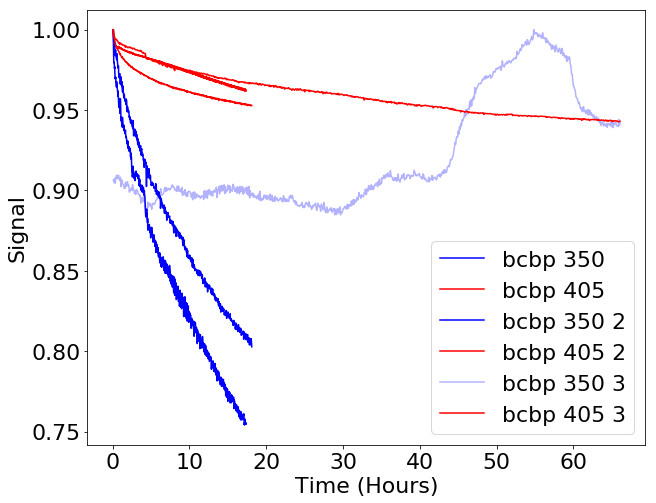

In [30]:
plt.plot(bcbp350405['On Time'],bcbp350405['350Signal'],c='blue',linestyle='-',label='bcbp 350')
plt.plot(bcbp350405['On Time'],bcbp350405['405Signal'],c='red',linestyle='-',label='bcbp 405')
plt.plot(bcbp350405_r2['On Time'],bcbp350405_r2['350Signal'],c='blue',linestyle='-',label='bcbp 350 2')
plt.plot(bcbp350405_r2['On Time'],bcbp350405_r2['405Signal'],c='red',linestyle='-',label='bcbp 405 2')
plt.plot(bcbp350405_r3['On Time'],bcbp350405_r3['350Signal'],c='blue',linestyle='-',label='bcbp 350 3',alpha=.3)
plt.plot(bcbp350405_r3['On Time'],bcbp350405_r3['405Signal'],c='red',linestyle='-',label='bcbp 405 3')
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
plt.legend()
plt.show()

### mCP

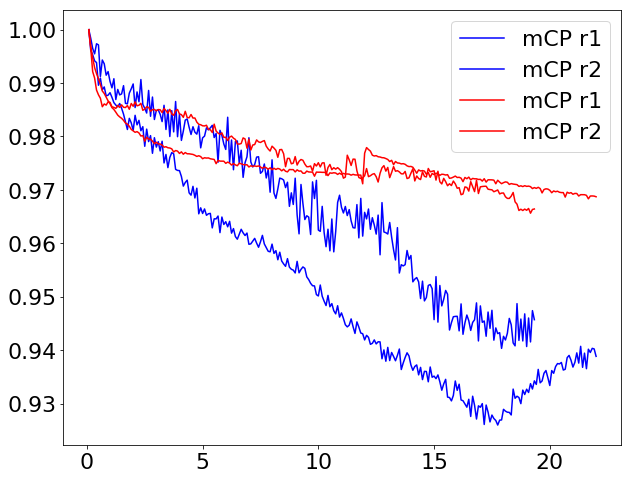

In [38]:
plt.plot(mcp350405['On Time'],mcp350405['350Signal'],label='mCP r1',c='blue')
plt.plot(mcp350405_r2['On Time'],mcp350405_r2['350Signal'],label='mCP r2',c='blue')
plt.plot(mcp350405['On Time'],mcp350405['405Signal'],label='mCP r1',c='red')
plt.plot(mcp350405_r2['On Time'],mcp350405_r2['405Signal'],label='mCP r2',c='red')
plt.legend()
plt.show()

### CDBP

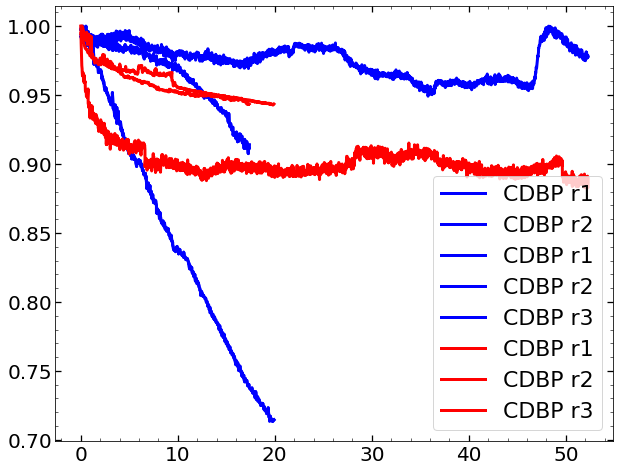

In [151]:
plt.plot(cdbp350405['On Time'],cdbp350405['350Signal'],label='CDBP r1',c='blue')
plt.plot(cdbp350405_r2['On Time'],cdbp350405_r2['350Signal'],label='CDBP r2',c='blue')
#plt.plot(cdbp350405_r3['On Time'],cdbp350405_r3['350Signal'],label='CDBP r3',c='blue')
plt.plot(cdbp350405['On Time'],cdbp350405['405Signal'],label='CDBP r1',c='red')
plt.plot(cdbp350405_r2['On Time'],cdbp350405_r2['405Signal'],label='CDBP r2',c='red')
#plt.plot(cdbp350405_r3['On Time'],cdbp350405_r3['405Signal'],label='CDBP r3',c='red')

plt.legend()
plt.show()

# Comparison with EL

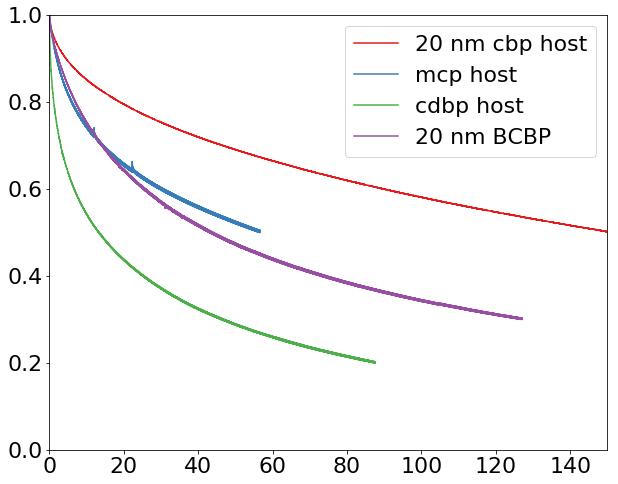

In [62]:
colors=palettable.colorbrewer.qualitative.Set1_9.mpl_colors
reps=[0,2,0,0]
#aids=[ObjectId('591b647841dae33fb0e7d5d3'), ObjectId('59074ef941dae324d4dd8452'), ObjectId('58f6479441dae3477c33c0fb'), ObjectId('58f649d141dae34f2c4d46a4'), ObjectId('59caa57e41dae316ccfa1da7')]
#gids=[ObjectId('59f388760fe5e7057cfbede2'),ObjectId('59caa5bf41dae316ccfa1e02'),ObjectId('5966813641dae35ccce5d8a8'),ObjectId('5966819441dae35e149509ea'),ObjectId('591b64b641dae33fb0e7d5d7'),ObjectId('59074f4241dae324d4dd8456'),ObjectId('58f6493c41dae32df0cec461'),ObjectId('58f64a4741dae34f2c4d46a8')]
gids=[ObjectId('58f6493c41dae32df0cec461'),ObjectId('59caa5bf41dae316ccfa1e02'),ObjectId('5966819441dae35e149509ea'),ObjectId('59074f4241dae324d4dd8456')]

for i,gid in enumerate(gids):
    g=db.growths.find_one({'_id':gid},{'experiment_label':1,'growth_date':1})
    #print(str(g['growth_date'])+g['experiment_label'])
    c=colors[i]
    lifeCursor=list(db.lifetimes.find({'growthID':gid,'ELtrust':2}))
    for ix,l in enumerate(lifeCursor):
        if ix==reps[i]:
            t,s=cleanSignal(l['ELonTime'],l['ELnormDevSignal'])
            plt.plot(t,s,c=c,label=g['experiment_label'])
        else:
            pass
            #plt.plot(l['ELonTime'],l['ELnormDevSignal'],c=c,label=str(g['growth_date'].date())+g['experiment_label'])
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.axis([0,150,0,1])
plt.show()   

# Spectra

C:\Users\kwher_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


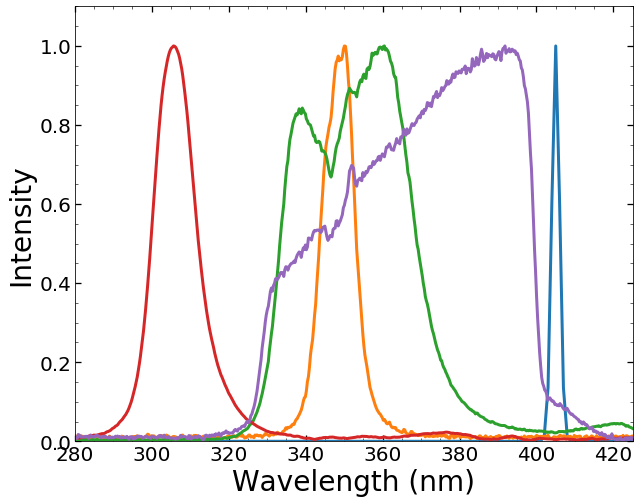

In [137]:
x=np.linspace(200, 1100, 901)
lsr=np.exp(-np.power(x - 405, 2.) / (2 * np.power(1, 2.)))
spectra405=pd.DataFrame({'Wavelength':x,'Intensity':lsr})
spectra350=pd.read_table('ldls350 spec.txt',skiprows=17,skipfooter=1,names=['Wavelength','Intensity'],engine='python')
spectra350.drop([0,1,2],inplace=True)
spectra350_40=pd.read_table('350_40_bp_spectra.txt',skiprows=17,skipfooter=1,names=['Wavelength','Intensity'],engine='python')
spectra350_40.drop([0,1,2],inplace=True)
spectra300=pd.read_table('300_400_spectra.txt',skiprows=17,skipfooter=1,names=['Wavelength','Intensity'],engine='python')
spectra300['Intensity']=spectra300['Intensity'].rolling(window=15,min_periods=0).mean() # needed because this is noisy and it throws off wavelength average
spectra325400=pd.read_table('325-400.txt',skiprows=17,skipfooter=1,names=['Wavelength','Intensity'],engine='python')
spectra325400.drop([0,1,2],inplace=True)
spectra325400short=spectra325400[spectra325400['Wavelength']<600]
spectra=[spectra405,spectra350,spectra350_40,spectra300,spectra325400short]


for s in spectra:
    s['Norm_Intensity']=(s['Intensity']-s['Intensity'].min())/(s['Intensity'].max()-s['Intensity'].min())
    plt.plot(s['Wavelength'],s['Norm_Intensity'])
#plt.legend(['405','350','350 40 FWHM','300','325-400'])
plt.axis([280,425,0,1.1])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()

#### Note: What I thought was a 300 long pass, was actually 300 bandpass 10nm FWHM.  This is why the spectra looks like that.

I have also hidden the featur of the 325-400 that is in the red.  I have shown the full spectra below.  The red feature will not be absorbed, but will affect the collected signal.

To prevent measurement of the red feature, I have put a short pass at 550 in front of the detector.  The measured spectra is shown below.

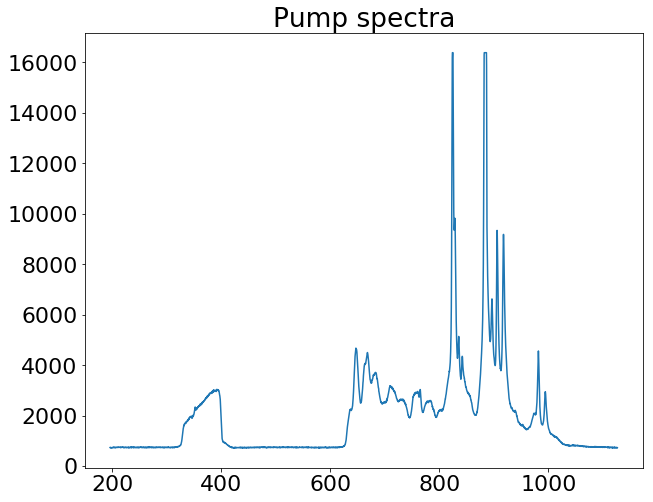

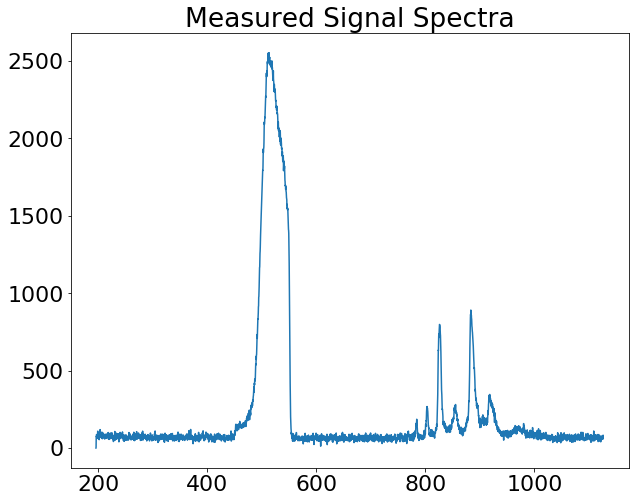

In [10]:
plt.plot(spectra325400['Wavelength'],spectra325400['Intensity'])
plt.title('Pump spectra')
plt.show()

plt.figure()
spectra325400spec=pd.read_table('325-400 spectra.txt',skiprows=17,skipfooter=1,names=['Wavelength','Intensity'],engine='python')
spectra325400spec.drop([0,1,2],inplace=True)

plt.plot(spectra325400spec['Wavelength'],spectra325400spec['Intensity'])
plt.title('Measured Signal Spectra')
plt.show()

# Intensities

One of the problems we have in comparing these optical degradations is the range of intensities, presented below.

In [11]:
mcpOC=db.opticalConstants.find_one({'label':'mcp'})
irppyOC=db.opticalConstants.find_one({'label':'Irppy'})
resp=pd.read_csv('detector_responsivity.csv',names=['Wavelength','Responsivity'])
mcp=pd.DataFrame({'Wavelength':mcpOC['wavelengths'],'n':mcpOC['n'],'k':mcpOC['k']})
irppy=pd.DataFrame({'Wavelength':irppyOC['wavelengths'],'n':irppyOC['n'],'k':irppyOC['k']})

#plt.plot(resp['Wavelength'],resp['Responsivity'])
#plt.show()

def avgResp(df):
    spec=np.interp(resp['Wavelength'],df['Wavelength'],df['Norm_Intensity'])
    avg=np.trapz(spec*resp['Responsivity'])/np.trapz(spec)
    return avg

def avgWave(df):
    avg=np.trapz(df['Norm_Intensity'])/(np.trapz(df['Norm_Intensity']/df['Wavelength']))
    return avg

def avgK(df,ref):
    df2=pd.merge(ref,df,on='Wavelength')
    avg=np.trapz(df2['k']*df2['Norm_Intensity'])/np.trapz(df2['Norm_Intensity'])
    return avg

    
intensities = pd.DataFrame(columns=['Label', 'Wavelength','Responsivity','OD', 'Signal','mcp_k','irppy_k','area'])
intensities.loc[0] = ['405',avgWave(spectra405),avgResp(spectra405),2,10.8E-6,avgK(spectra405,mcp),0.05*avgK(spectra405,irppy),.25*np.pi]
intensities.loc[1] = ['350',avgWave(spectra350_40),avgResp(spectra350_40),0,0.36E-6,avgK(spectra350_40,mcp),0.05*avgK(spectra405,irppy),6.25*np.pi]
intensities.loc[2] = ['325-400',avgWave(spectra325400short),avgResp(spectra325400short),0,19E-6,avgK(spectra325400short,mcp),0.05*avgK(spectra325400short,irppy),6.25*np.pi]
intensities.loc[3] = ['300',avgWave(spectra300),avgResp(spectra300),0,8E-9,avgK(spectra300,mcp),0.05*avgK(spectra405,irppy),6.25*np.pi]

intensities['Power']=intensities['Signal']/intensities['Responsivity']*6.2E18
intensities['Photon Energy']=1240/intensities['Wavelength']
intensities['Photons/Sec']=intensities['Power']/intensities['Photon Energy']
intensities['mcp_Absorbed']=1-1/10**intensities['mcp_k']
intensities['irppy_Absorbed']=1-1/10**intensities['irppy_k']
intensities['mcp_abs/sec/A']=intensities['Photons/Sec']*intensities['mcp_Absorbed']/intensities['area']
intensities['irppy_abs/sec/A']=intensities['Photons/Sec']*intensities['irppy_Absorbed']/intensities['area']

intensities[['Label','Wavelength','Signal','mcp_abs/sec/A','irppy_abs/sec/A']]

,Label,Wavelength,Signal,mcp_abs/sec/A,irppy_abs/sec/A
0,405,404.997531,1.080000e-05,0.000000e+00,2.654597e+12
1,350,363.988847,3.600000e-07,1.889338e+10,4.616466e+09
2,325-400,368.383745,1.900000e-05,3.483376e+11,2.204249e+11
3,300,354.099846,8.000000e-09,4.830881e+08,1.234540e+08


# Optical Constants and Absorption

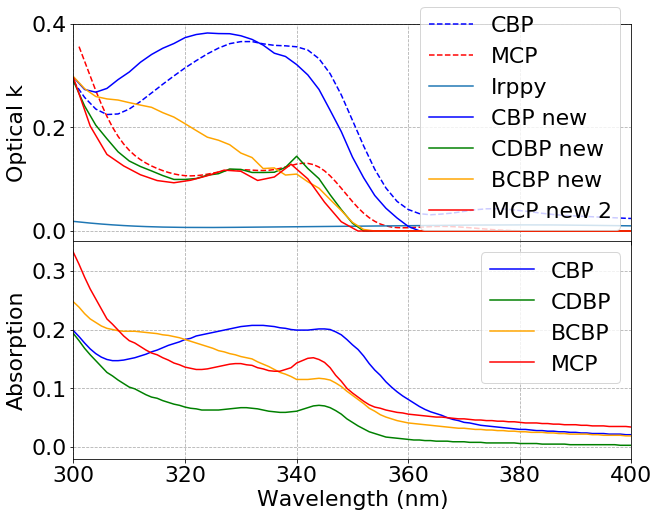

In [12]:
f, axarr = plt.subplots(2, sharex=True)

# From DB
cbpOC=db.opticalConstants.find_one({'label':'CBP'})
axarr[0].plot(cbpOC['wavelengths'],cbpOC['k'],label='CBP',color='blue',linestyle='--')
mcpOC=db.opticalConstants.find_one({'label':'mcp'})
axarr[0].plot(mcpOC['wavelengths'],mcpOC['k'],label='MCP',color='red',linestyle='--')
irppyOC=db.opticalConstants.find_one({'label':'Irppy'})
axarr[0].plot(irppyOC['wavelengths'],np.array(irppyOC['k'])*.05,label='Irppy')
#glassOC=db.opticalConstants.find_one({'label':'SiO2'})
#plt.plot(glassOC['wavelengths'],np.array(glassOC['k']),label='SiO2')

# From files (Temporary)
cbpOC_new=pd.read_csv('cbp_oc.csv')
axarr[0].plot(cbpOC_new['nm'],cbpOC_new['k '],label='CBP new',color='blue')

cdbpOC_new=pd.read_csv('cdbp_oc.csv')
axarr[0].plot(cdbpOC_new['nm'],cdbpOC_new['k '],label='CDBP new',color='green')
bcbpOC_new=pd.read_csv('bcbp_oc.csv')
axarr[0].plot(bcbpOC_new['nm'],bcbpOC_new['k '],label='BCBP new',color='orange')
#mcpOC_new=pd.read_csv('mcp_oc.csv')
#axarr[0].plot(mcpOC_new['nm'],mcpOC_new['k '],label='MCP new',color='red')
mcpOC_new=pd.read_excel('mcp_oc2.xls')
axarr[0].plot(mcpOC_new['nm'],mcpOC_new['k '],label='MCP new 2',color='red')
axarr[0].legend()

axarr[0].set_ylabel('Optical k')
axarr[0].axis([300,400,-0.02,.4])


absCBP=pd.read_table('CBP.ASC',skiprows=6,delimiter=' ',usecols=[2,6],names=['Wavelength','abs'])
axarr[1].plot(absCBP['Wavelength'],absCBP['abs'],label='CBP',color='blue')
absCDBP=pd.read_table('CDBP.ASC',skiprows=6,delimiter=' ',usecols=[2,6],names=['Wavelength','abs'])
axarr[1].plot(absCDBP['Wavelength'],absCDBP['abs'],label='CDBP',color='green')
absBCBP=pd.read_table('BCBP.ASC',skiprows=6,delimiter=' ',usecols=[2,6],names=['Wavelength','abs'])
axarr[1].plot(absBCBP['Wavelength'],absBCBP['abs'],label='BCBP',color='orange')
absMCP=pd.read_table('MCP.ASC',skiprows=6,delimiter=' ',usecols=[2,6],names=['Wavelength','abs'])
axarr[1].plot(absMCP['Wavelength'],absMCP['abs'],label='MCP',color='red')
axarr[1].legend()
axarr[1].set_xlabel('Wavelength (nm)')
axarr[1].set_ylabel('Absorption')
axarr[1].axis([300,400,-0.02,.35])
plt.subplots_adjust(wspace=0, hspace=0)
axarr[0].grid('on', linestyle='--')
axarr[1].grid('on', linestyle='--')


plt.show()

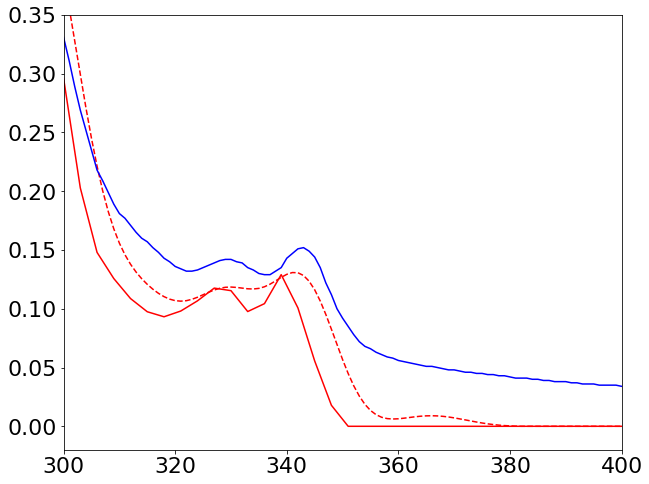

In [13]:
plt.plot(mcpOC['wavelengths'],mcpOC['k'],label='MCP',color='red',linestyle='--')
plt.plot(mcpOC_new['nm'],mcpOC_new['k '],label='MCP new 2',color='red')
plt.plot(absMCP['Wavelength'],absMCP['abs'],label='MCP',color='blue')
plt.axis([300,400,-0.02,.35])
plt.show()

# Paper Figures

## Figure 1: Optical Constants

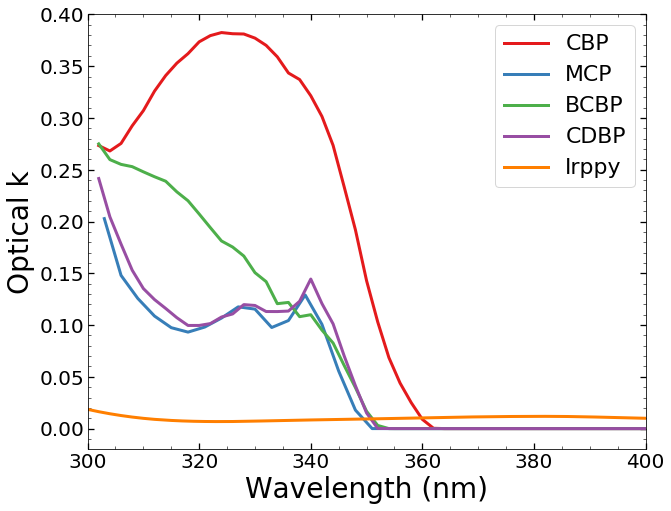

In [98]:
# From DB
plt.gca().set_prop_cycle(cycler('color',palettable.colorbrewer.qualitative.Set1_9.mpl_colors))
cbpOC=db.opticalConstants.find_one({'label':'cbp','acquiredBy':'kyle'})
plt.plot(cbpOC['wavelengths'],cbpOC['k'],label='CBP')
mcpOC=db.opticalConstants.find_one({'label':'mcp','acquiredBy':'kyle'})
plt.plot(mcpOC['wavelengths'],mcpOC['k'],label='MCP')

bcbpOC=db.opticalConstants.find_one({'label':'bcbp'})
plt.plot(bcbpOC['wavelengths'],bcbpOC['k'],label='BCBP')
cdbpOC=db.opticalConstants.find_one({'label':'cdbp'})
plt.plot(cdbpOC['wavelengths'],cdbpOC['k'],label='CDBP')
irppyOC=db.opticalConstants.find_one({'label':'Irppy'})
plt.plot(irppyOC['wavelengths'],np.array(irppyOC['k'])*.05,label='Irppy')

#plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
#plt.gca().yaxis.set_minor_locator(MultipleLocator(.01))
plt.legend()
#plt.tick_params(axis='both',direction='in',top='on',right='on',length=6,width=1.4)
#plt.tick_params(axis='both',which='minor',direction='in',top='on',right='on',length=3)
plt.ylabel('Optical k')
plt.xlabel('Wavelength (nm)')
plt.axis([300,400,-0.02,.4])
plt.show()

## Figure 2: Electrical Lifetimes

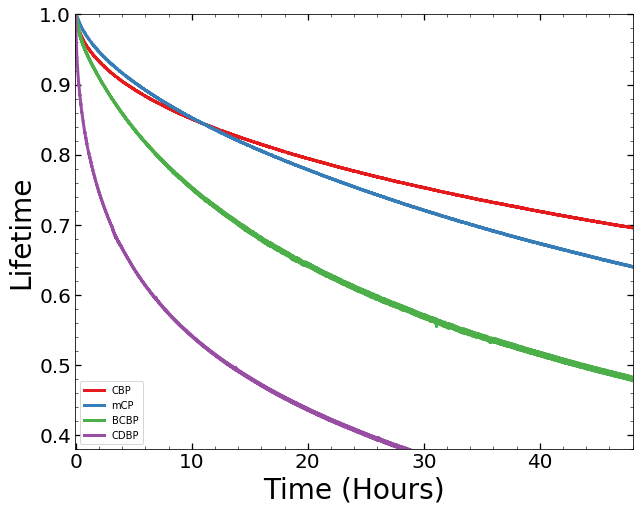

In [4]:
colors=palettable.colorbrewer.qualitative.Set1_9.mpl_colors
#gids=[ObjectId('59caa5bf41dae316ccfa1e02'),ObjectId('5966819441dae35e149509ea'),ObjectId('59074f4241dae324d4dd8456'),ObjectId('58f6493c41dae32df0cec461')]
#lids=[ObjectId('59e108bfc7cea10f5483c03f'),ObjectId('59668e36a0df9323ca83c213'),ObjectId('5908d8a3a0df9349fe3b49ae'),ObjectId('58f6697ba0df931940fabcd0')]
lids=[ObjectId('58f6697ba0df931940fabcd0'),ObjectId('59023f9fa0df931d25d943e2'),ObjectId('5908d8a3a0df9349fe3b49ae'),ObjectId('59668e36a0df9323ca83c213')]
for i,lid in enumerate(lids):
    l=db.lifetimes.find_one({'_id':lid})
    #print(l['experiment_label'])
    c=colors[i]
    t,s=cleanSignal(l['ELonTime'],l['ELnormDevSignal'])
    plt.plot(t,s,c=c,label=l['experiment_label'])

plt.legend(['CBP','mCP','BCBP','CDBP'],loc=3)

PLreps=[0,0,0,1]
#gids=[ObjectId('59caa5bf41dae316ccfa1e02'),ObjectId('5966819441dae35e149509ea'),ObjectId('59074f4241dae324d4dd8456'),ObjectId('58f6493c41dae32df0cec461')]
lids=[ObjectId('59023fb6a0df931d25d943e7'),ObjectId('59023f9fa0df931d25d943e2'),ObjectId('5908d8a3a0df9349fe3b49ae'),ObjectId('59668e36a0df9323ca83c213')]

#59023fb6a0df931d25d943e7

#59023f9fa0df931d25d943e2
for i,lid in enumerate(lids):
    l=db.lifetimes.find_one({'_id':lid})
    #print(l['luminance'])
    c=colors[i]
    t,s=cleanSignal(l['PLonTime'],l['PLnormSignal'])
    if lid==ObjectId('5908d8a3a0df9349fe3b49ae'):
        s=s/.65
    #plt.scatter(t,s,edgecolor=c,s=50,label=l['experiment_label'],facecolor='white')

#plt.gca().xaxis.set_minor_locator(MultipleLocator(.5))
#plt.gca().yaxis.set_minor_locator(MultipleLocator(.02))
plt.xlabel('Time (Hours)')
plt.ylabel('Lifetime')
plt.axis([-.1,48,.38,1])
#plt.tick_params(axis='both',direction='in',top='on',right='on',length=6,width=1.4)
#plt.tick_params(axis='both',which='minor',direction='in',top='on',right='on',length=3)

plt.show()

## Figure 3: Degradation at 350 nm

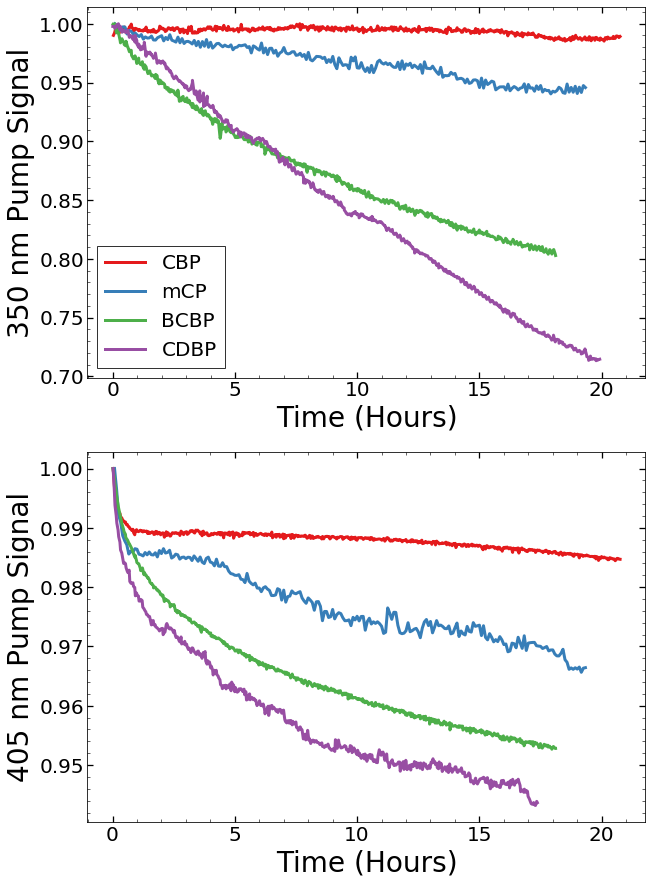

In [8]:
#f, axarr = plt.subplots(2, sharex=True,figsize=(10,15))
f, axarr = plt.subplots(2, figsize=(10,15))

#axarr[0].set_color_cycle(palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
#axarr[0].set_prop_cycle(cycler('color',palettable.colorbrewer.qualitative.Set1_9.mpl_colors))
axarr[0].plot(cbp350405['On Time'],cbp350405['350Signal'],label='CBP')
axarr[0].plot(mcp350405_r2['On Time'],mcp350405_r2['350Signal'],label='mCP')
axarr[0].plot(bcbp350405_r2['On Time'],bcbp350405_r2['350Signal'],label='BCBP')
axarr[0].plot(cdbp350405['On Time'],cdbp350405['350Signal'],label='CDBP')
#axarr[0].plot(cdbp350405_r2['On Time'],cdbp350405_r2['350Signal'],label='CDBP')

axarr[0].legend()
axarr[0].set_ylabel('350 nm Pump Signal')

#axarr[1].set_prop_cycle(cycler('color',palettable.colorbrewer.qualitative.Set1_9.mpl_colors))
axarr[1].plot(cbp350405['On Time'],cbp350405['405Signal'],label='CBP')
axarr[1].plot(mcp350405_r2['On Time'],mcp350405_r2['405Signal'],label='mCP')
axarr[1].plot(bcbp350405_r2['On Time'],bcbp350405_r2['405Signal'],label='BCBP')

#axarr[1].plot(cdbp350405['On Time'],cdbp350405['405Signal'],label='CDBP')
axarr[1].plot(cdbp350405_r2['On Time'],cdbp350405_r2['405Signal'],label='CDBP')


axarr[1].set_ylabel('405 nm Pump Signal')
axarr[1].set_xlabel('Time (Hours)')
axarr[0].set_xlabel('Time (Hours)')

#plt.subplots_adjust(wspace=0, hspace=0.02)
plt.show()

## Figure 4: EQE

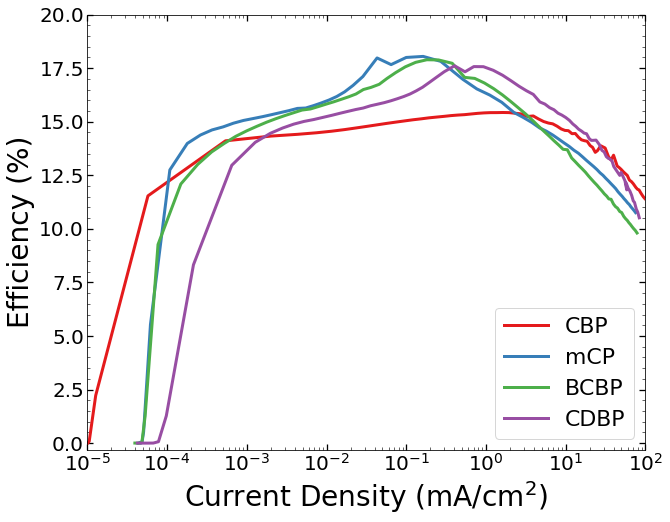

In [148]:
colors=palettable.colorbrewer.qualitative.Set1_9.mpl_colors
reps=[2,7,2,6]
#gids=[ObjectId('59caa5bf41dae316ccfa1e02'),ObjectId('5966819441dae35e149509ea'),ObjectId('59074f4241dae324d4dd8456'),ObjectId('58f6493c41dae32df0cec461')]
gids=[ObjectId('58f6493c41dae32df0cec461'),ObjectId('59caa5bf41dae316ccfa1e02'),ObjectId('59074f4241dae324d4dd8456'),ObjectId('5966819441dae35e149509ea')]
labels=['CBP','mCP','BCBP','CDBP']

for i,gid in enumerate(gids):
    g=db.growths.find_one({'_id':gid},{'experiment_label':1,'devices':1})
    c=colors[i]
    for ix,d in enumerate(g['devices']):
        if ix==reps[i]:
            plt.semilogx(d['J'],d['EQE'],c=c,label=g['experiment_label'])
            #print(np.amax(d['EQE']))
        else:
            pass
            #plt.semilogx(d['J'],d['EQE'],c=c,label=g['experiment_label'],alpha=.1)
        
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(),loc=4)
plt.legend(labels)
plt.axis([1E-5,1E2,-0.3,20])
#plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(.5))
#plt.tick_params(axis='both',which='major',direction='in',top='on',right='on',length=6,width=1.4)
#plt.tick_params(axis='both',which='minor',direction='in',top='on',right='on',length=3)
plt.xlabel('Current Density (mA/cm$^2$)')
plt.ylabel('Efficiency (%)')
plt.show()

## Figure 5: 405 Degradation

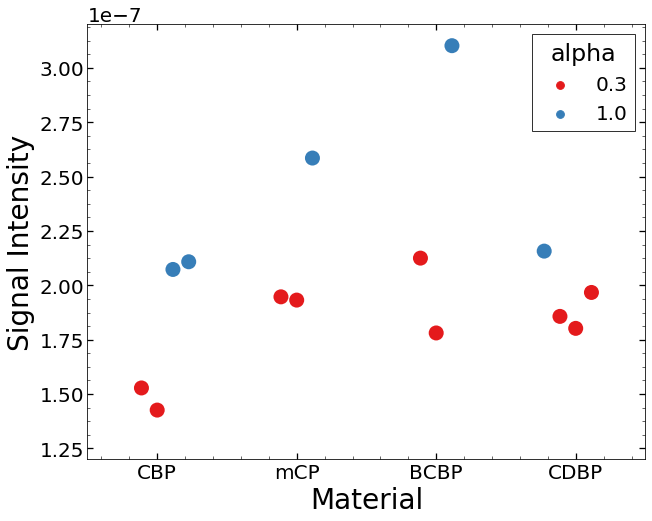

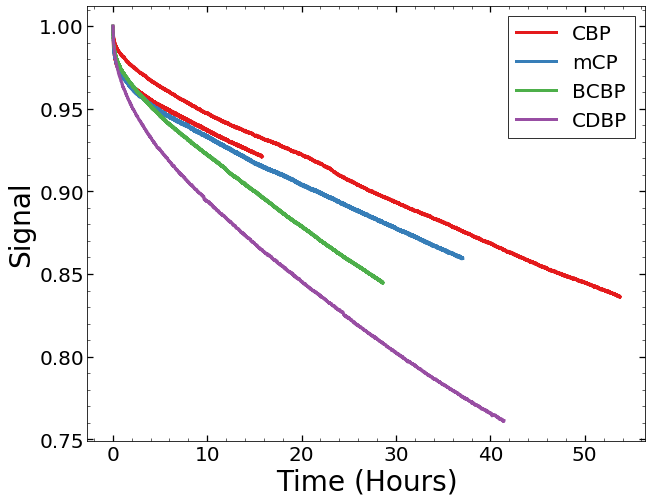

In [5]:
plt.gca().set_prop_cycle(cycler('color',palettable.colorbrewer.qualitative.Set1_9.mpl_colors))
colors=palettable.colorbrewer.qualitative.Set1_9.mpl_colors

#plt.plot(cbp405['On Time'],cbp405['Signal'],label='CBP',linewidth=3,linestyle='--')
#plt.plot(mcp405['On Time'],mcp405['Signal'],label='mCP',linewidth=3,linestyle='--')

df=pd.DataFrame(columns=['Material','Signal'])
df=df.append({'Material':'CBP','Signal':float(cbp405_r2.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'CBP','Signal':float(cbp405_r3.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'CBP','Signal':float(cbp405_d2_r1.head(1)['Laser Signal']),'alpha':1},ignore_index=True)
df=df.append({'Material':'CBP','Signal':float(cbp405_d2_r2.head(1)['Laser Signal']),'alpha':1},ignore_index=True)
df=df.append({'Material':'mCP','Signal':float(mcp405_r1.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'mCP','Signal':float(mcp405_r2.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'mCP','Signal':float(mcp405_d2_r1.head(1)['Laser Signal']),'alpha':1},ignore_index=True)
df=df.append({'Material':'BCBP','Signal':float(bcbp405_r4.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'BCBP','Signal':float(bcbp405_r5.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'BCBP','Signal':float(bcbp405_d2_r1.head(1)['Laser Signal']),'alpha':1},ignore_index=True)
df=df.append({'Material':'CDBP','Signal':float(cdbp405_r1.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'CDBP','Signal':float(cdbp405_r2.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)
df=df.append({'Material':'CDBP','Signal':float(cdbp405_r3.head(1)['Laser Signal']),'alpha':.3},ignore_index=True)#
df=df.append({'Material':'CDBP','Signal':float(cdbp405_d2_r1.head(1)['Laser Signal']),'alpha':1},ignore_index=True)#
#print(bcbp405_d2_r1.head(1)['Laser Signal'])

sns.swarmplot(data = df, x = "Material", y = "Signal",size=15,hue='alpha')
plt.axis([-.5,3.5,1.2E-7,3.2E-7])
plt.ylabel('Signal Intensity')
plt.show()

plt.figure()
#plt.plot(cbp405_r2['On Time'],cbp405_r2['405Signal'],label='CBP',linewidth=3,c=colors[0],alpha=.01)
#plt.plot(cbp405_r3['On Time'],cbp405_r3['Signal'],label='CBP',linewidth=3,c=colors[0],alpha=.01)
plt.plot(cbp405_d2_r1['On Time'],cbp405_d2_r1['Signal'],label='CBP',linewidth=3,c=colors[0])
plt.plot(cbp405_d2_r2['On Time'],cbp405_d2_r2['Signal'],label='CBP',linewidth=3,c=colors[0])

#plt.plot(mcp405_r1['On Time'],mcp405_r1['Signal'],label='mCP',linewidth=3,c=colors[1],alpha=.01)
#plt.plot(mcp405_r2['On Time'],mcp405_r2['Signal'],label='mCP',linewidth=3,c=colors[1],alpha=.01)
plt.plot(mcp405_d2_r1['On Time'],mcp405_d2_r1['Signal'],label='mCP',linewidth=3,c=colors[1])
#plt.plot(mcp405_d2_r2['On Time'],mcp405_d2_r2['Signal'],label='mCP',linewidth=3,c=colors[1])

#plt.plot(bcbp405_r4['On Time'],bcbp405_r4['405Signal'],label='BCBP',linewidth=3,c=colors[2],alpha=.01)
#plt.plot(bcbp405_r5['On Time'],bcbp405_r5['Signal'],label='BCBP',linewidth=3,c=colors[2],alpha=.01)
plt.plot(bcbp405_d2_r1['On Time'],bcbp405_d2_r1['Signal'],label='BCBP',linewidth=3,c=colors[2])

#plt.plot(cdbp405_r1['On Time'],cdbp405_r1['405Signal'],label='CDBP',linewidth=3,c=colors[3],alpha=.01)
#plt.plot(cdbp405_r2['On Time'],cdbp405_r2['Signal'],label='CDBP',linewidth=3,c=colors[3],alpha=.01)
#plt.plot(cdbp405_r3['On Time'],cdbp405_r3['Signal'],label='CDBP',linewidth=3,c=colors[3],alpha=.01)
plt.plot(cdbp405_d2_r1['On Time'],cdbp405_d2_r1['Signal'],label='CDBP',linewidth=3,c=colors[3])


#plt.axis([-1,20,.9,1.01])
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

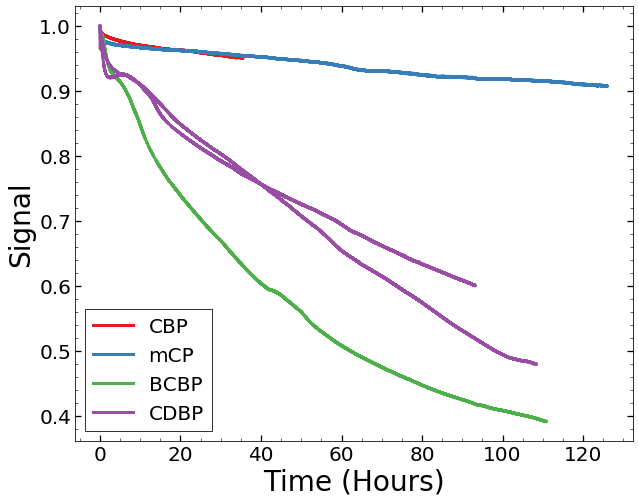

In [12]:

plt.plot(cbp405_1pct_r1['On Time'],cbp405_1pct_r1['Signal'],label='CBP',linewidth=3,c=colors[0])


plt.plot(mcp405_1pct_r1['On Time'],mcp405_1pct_r1['Signal'],label='mCP',linewidth=3,c=colors[1])

plt.plot(bcbp405_1pct_r1['On Time'],bcbp405_1pct_r1['Signal'],label='BCBP',linewidth=3,c=colors[2])

plt.plot(cdbp405_1pct_r1['On Time'],cdbp405_1pct_r1['Signal'],label='CDBP',linewidth=3,c=colors[3])

plt.plot(cdbp405_1pct_r2['On Time'],cdbp405_1pct_r2['Signal'],label='CDBP',linewidth=3,c=colors[3])


#plt.axis([-1,20,.9,1.01])
plt.xlabel('Time (Hours)')
plt.ylabel('Signal')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

This trend is not the same as 350 or electrical.  Why are the initial signals different?  Does it indicate something is off with concentration?  

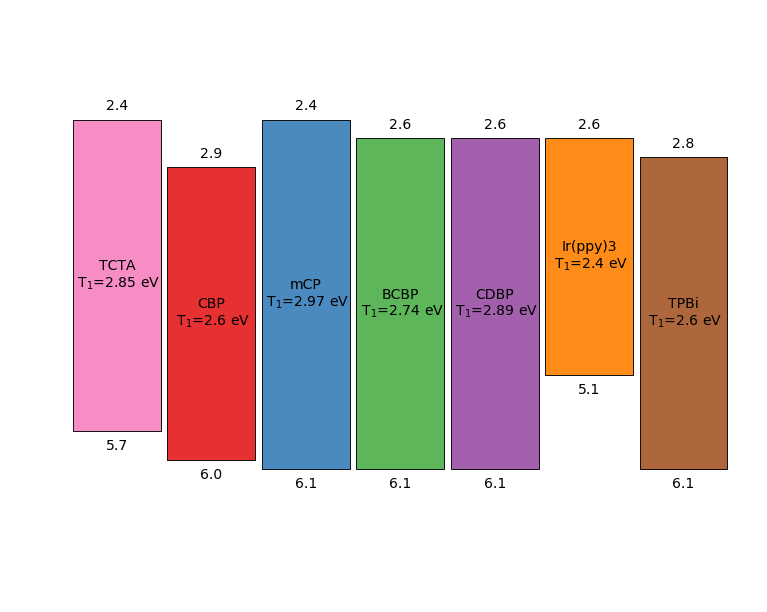

In [129]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def label(xy,side,text):
    textOffset=.15
    recWidth=.9
    recSpace=.1
    totWidth=recWidth+recSpace
    if side=='t':
        y = xy[1] + textOffset        # shift y-value for label so that it's below the artist
    elif side=='b':
        y = xy[1] - textOffset
    else:
        y=xy[1]
    x=xy[0]+totWidth/2
    plt.text(x, y, text, ha="center",va="center", family='sans-serif', size=14)

# user parameters
#######################################

# list of commonName
recWidth=.93
recSpace=.07
#######################################

layers=[ObjectId("59569487a0df932ba51d8e91"),ObjectId("59569487a0df932ba51d8e78"),ObjectId("59569487a0df932ba51d8e88"),ObjectId("596cef1658972419d0d972b2"),ObjectId("59569487a0df932ba51d8e79"),ObjectId("59569487a0df932ba51d8e84"),ObjectId("59569487a0df932ba51d8e93")]
colors=palettable.colorbrewer.qualitative.Set1_9.mpl_colors
cs=[colors[7],colors[0],colors[1],colors[2],colors[3],colors[4],colors[6]]

# initialize
fig, ax = plt.subplots()
totWidth=recWidth+recSpace
patches = []
#cs=[]
colorIter=0

# loop through layers
for i,e in enumerate(layers):
    mat=db.materials.find_one({'_id':e})
    if not mat:
        mat={'commonName':e}
        mat={'formattedName':e}
    if 'HOMO' in mat:
        homo=mat['HOMO']
        label([i*totWidth,-homo],'b',str(homo))
    else:
        homo=5
        label([i*totWidth,-homo],'b','?')
    if 'LUMO' in mat:
        lumo=mat['LUMO']
        if not lumo==homo:
            label([i*totWidth,-lumo],'t',str(lumo))
    else:
        lumo=3
        label([i*totWidth,-lumo],'t','?')
    rect = mpatches.Rectangle([totWidth*i+recSpace/2,-homo], recWidth, homo-lumo, ec="none",linewidth=4,linestyle='solid')
    patches.append(rect)

    # label the rectangle and iterate color if needed
    if homo==lumo:
        label([i*totWidth,-homo+(homo-lumo)/2],'t',mat['formattedName'])
        #cs.append(np.array(colors[colorIter%8])/256.0)
    else:
        label([i*totWidth,-homo+(homo-lumo)/2],'c',mat['formattedName']+'\n T$_1$='+str(mat['E_T'])+ ' eV')
        #cs.append(np.array(colors[colorIter%8])/256)
        colorIter=colorIter+1

collection = PatchCollection(patches, facecolors=cs, edgecolors='black',alpha=0.9)
ax.add_collection(collection)

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis('equal')
plt.axis('off')

plt.show()